In [1]:
# Just the normal prequisites for using matplotlib and numpy in a Jupyter notebook
%matplotlib inline
# Use the svg backend, in my opinion it just makes better looking plots
%config InlineBackend.figure_format = 'svg'

from scipy import signal
from PySpice.Unit import *
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Math import *
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import unittest

import SchemDraw as schemdraw
import SchemDraw.elements as elm

# The spice and kicad modules are located above us
import sys
sys.path.append('../../lib/python')

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

directory_path = Path(os.path.abspath('')).resolve().parent.parent
spice_libraries_path = directory_path.joinpath("lib", "spice")
spice_library = SpiceLibrary(spice_libraries_path)

In [ ]:
## schema definitions
d = schemdraw.Drawing()
q1 = d.add(elm.transistors.BjtNpn)
q1.add_label('$Q_1$', loc='center', ofst=[0,-1], align=('right','bottom'))
lineA = d.add(elm.Line('up', xy=q1.collector, l=1.5))
d.add(elm.Dot, lftlabel='1')
#d.add(elm.Line('up', l=0.75))
d.add(elm.Resistor('up', label='$R_1$', rgtlabel='+15V'))
d.add(elm.Line('down', xy=q1.emitter, l=1.5))
tail = d.add(elm.Line('right', l=1.5))
d.add(elm.Dot, toplabel='2')
d.add(elm.Resistor('down', label='$R_3$', lftlabel='-15V'))
d.add(elm.Line('right', xy=tail.end,  l=1.5))
d.add(elm.Line('up', l=1.5))
q2 = d.add(elm.transistors.BjtNpn('right', anchor='emitter'))
lineB = d.add(elm.Line('up', l=0.75))
d.add(elm.Dot, lftlabel='3')
d.add(elm.Line('up', l=0.75))
r2 = d.add(elm.Resistor('up', label='$R_2$', rgtlabel='+15V'))
d.add(elm.Line('left', xy=q2.base, l=0.5))
d.add(elm.Ground())
lineBout = d.add(elm.Line('right', xy=lineB.end, l=0.5, rgtlabel='$v_{out2}$'))
d.add(elm.Line('right', xy=lineA.end, tox=lineBout.end, rgtlabel='$v_{out1}$'))
d.add(elm.Line('left', xy=q1.base, l=0.5, lftlabel='$V_{in}$'))
d.draw()


In [ ]:

circuit = Circuit('basic long tailed pair amplifier')
circuit.include(spice_library['BC547B'])

circuit.V('1', '+15V', circuit.gnd, 15@u_V)
circuit.V('2', '-15V', circuit.gnd, -15@u_V)
Vin = circuit.V('input', 'input', circuit.gnd, 'DC 1V AC 1V SIN(0 10m 1k)')
circuit.R('1', '+15V', 'qcola', 15@u_kOhm)
circuit.R('2', '+15V', 'qcolb', 15@u_kOhm)
circuit.BJT('1', 'qcola', 'input', 2, model='BC547B')
circuit.BJT('2', 'qcolb', circuit.gnd, 2, model='BC547B')
circuit.R('3', '2', '-15V', 15@u_kOhm)

print(str(circuit))



![status](https://img.shields.io/github/contributors/othneildrew/Best-README-Template.svg?style=flat-square)

## *metall*

*table of contents*
===================

* [*about*](#about)
* [*construction*](#construction)
* [*calibration*](#calibration)
* [*usage*](#usage)
* [*credits*](#credits)
* [*links*](#links)
* [*changelog*](#changelog)
  
## *about*

<img src="https://spielhuus.github.io/elektrophon/images/4046-logo-tmb.jpg" align="right"/>
Metalizer is the wavefolder module from Yvess Usson. The module uses the Lockhart waveshaper from Hutchins (Frequency multiplication and division methods. Electronotes 1976, 70) and also used in one section of the serge waveshaper. Yves Usson multiplied the lockhart waveshaper and made it CV controllable. This module creates harsh harmonics. 

lockhart frequency trippler

In [ ]:
## schema definitions
d = schemdraw.Drawing()
r1 = d.add(elm.Resistor('down', label='$R_1$', rgtlabel='+15V'))
q1 = d.add(elm.transistors.BjtPnp('right', anchor='emitter'))
q2 = d.add(elm.transistors.BjtNpn('right', anchor='collector', xy=q1.collector))
r2 = d.add(elm.Resistor('down', label='$R_2$', xy=q2.emitter, lftlabel='-15V'))

d.draw()

In [5]:
circuit = Circuit('lockhart frequency trippler')
circuit.include(spice_library['BC846B'])
circuit.include(spice_library['BC556B'])

circuit.V('1', '+15V', circuit.gnd, 15@u_V)
circuit.V('2', '-15V', circuit.gnd, -15@u_V)
Vin = circuit.V('input', 'input', circuit.gnd, 'DC 1V AC 0.1V SIN(0 1V 1k)')
circuit.R('1', '+15V', 'qema', 15@u_kOhm)
circuit.R('2', '-15V', 'qemb', 15@u_kOhm)
circuit.BJT('1', 'output', 'input', 'qema', model='BC556B')
circuit.BJT('2', 'output','input', 'qemb', model='BC846B')

print(str(circuit))

.title lockhart frequency trippler
.include /home/etienne/Documents/elektrophon/lib/spice/transistor/bc5x7.lib
V1 +15V 0 15V
V2 -15V 0 -15V
Vinput input 0 DC 1V AC 0.1V SIN(0 .1V 1k)
R1 +15V qema 15kOhm
R2 -15V qemb 15kOhm
Q1 output input qema BC556B
Q2 output input qemb BC846B



2020-07-30 16:23:09,579 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - Error: bad type for debug var
2020-07-30 16:23:09,580 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - WARNING - Warning: ngspice compiled without debug messages


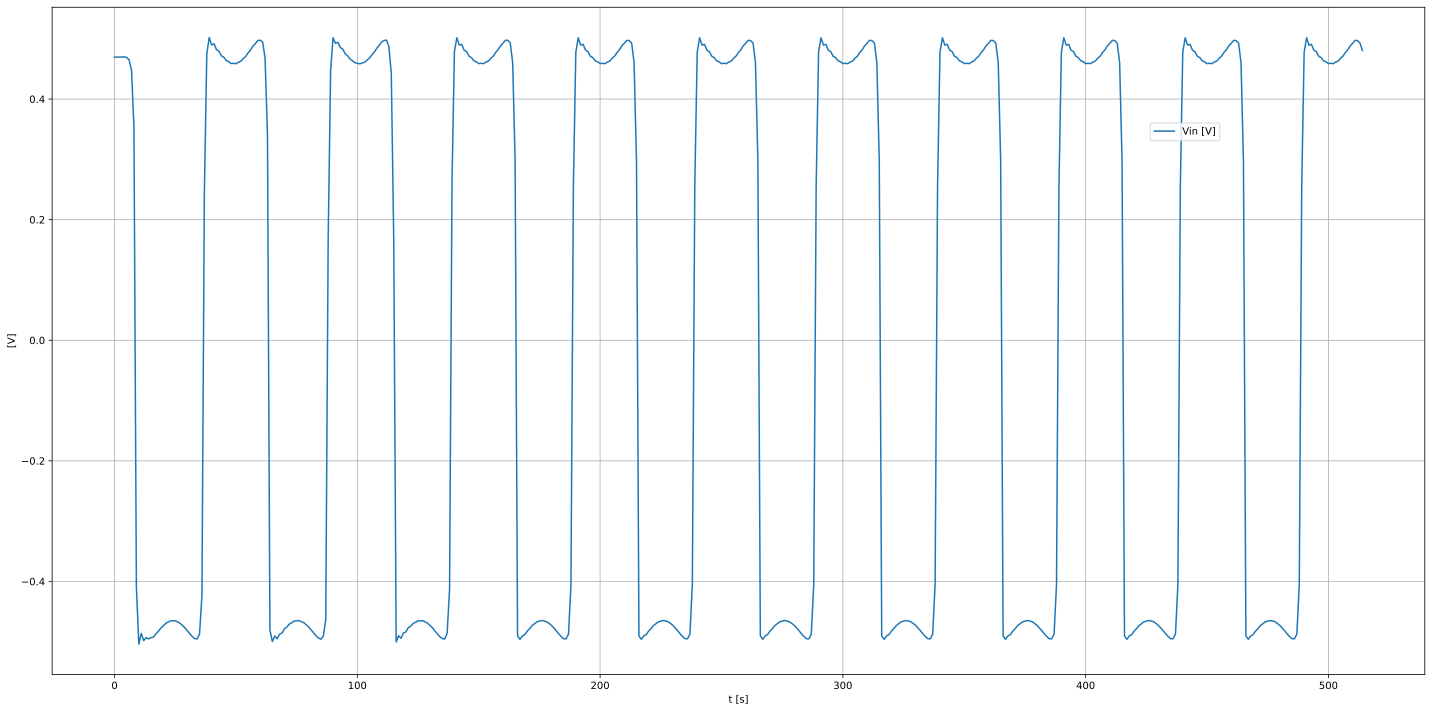

In [6]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=20@u_us, end_time=10@u_ms)

figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis['input'])  # JackIn input
ax.plot(analysis['output'])  # JackIn input
ax.legend(('Vin [V]', 'Vout [V]'), loc=(.8, .8))
ax.grid()
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')

plt.tight_layout()
plt.show()

## *construction*

In [ ]:
# Just the normal prequisites for using matplotlib and numpy in a Jupyter notebook
%matplotlib inline
# Use the svg backend, in my opinion it just makes better looking plots
%config InlineBackend.figure_format = 'svg'

from scipy import signal
from PySpice.Unit import *
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Math import *
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import unittest

# The spice and kicad modules are located above us
import sys
sys.path.append('../../lib/python')

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

directory_path = Path(os.path.abspath('')).resolve().parent.parent
spice_libraries_path = directory_path.joinpath("lib", "spice", "transistor")
spice_library = SpiceLibrary(spice_libraries_path)

class q1(SubCircuitFactory):

    __name__ = 'q1'

    __nodes__ = ('OUT_B', 'IN', 'Net-_Q1-Pad3_')

    def __init__(self):

        super().__init__()

        self.X('q1', 'BC547B', 'OUT_B', 'IN', 'Net-_Q1-Pad3_')

class q2(SubCircuitFactory):

    __name__ = 'q2'

    __nodes__ = ('OUT_B', 'IN', 'Net-_Q1-Pad3_')

    def __init__(self):

        super().__init__()

        self.X('q2', 'BC547B', 'OUT_B', 'IN', 'Net-_Q1-Pad3_')


class xu1(SubCircuitFactory):

    __name__ = 'xu1'

    __nodes__ = ('NON_INVERTING', 'INVERTING', 'POWER_POSITIVE', "POWER_NEGATIVE", "OUT" )

    def __init__(self):

        super().__init__()

        self.X('xu1', 'OPA2134', "NON_INVERTING", "INVERTING", "POWER_POSITIVE", "POWER_NEGATIVE", "OUT", "NSD")

class xu2(SubCircuitFactory):

    __name__ = 'xu2'

    __nodes__ = ('NON_INVERTING', 'INVERTING', 'POWER_POSITIVE', "POWER_NEGATIVE", "OUT" )

    def __init__(self):

        super().__init__()

        self.X('xu2', 'OPA2134', "NON_INVERTING", "INVERTING", "POWER_POSITIVE", "POWER_NEGATIVE", "OUT", "NSD")

class VJ1(SubCircuitFactory):

    __name__ = 'VJ1'
    __nodes__ = ('input', 'ground', 'x' )

    def __init__(self):

        super().__init__()

        self.V('IN', 'GND', 'input', 'DC 0V AC 1V SIN(0 5 1k)' )


class RJ2(SubCircuitFactory):

    __name__ = 'JackOut'
    __nodes__ = ('output', 'ground', 'x' )

    def __init__(self):

        super().__init__()

        self.R('load', 'output', 'x', 1000@u_Ω)

directory_path = Path(os.path.abspath('')).resolve()
kicad_netlist_path = directory_path.joinpath(
    'transistor pair5.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

circuit = parser.build_circuit(ground=5)

circuit.include(spice_library['BC547B'])
circuit.include(spice_library['OPA2134'])

for subcircuit in ( VJ1(), q1(), q2(), xu1() ):
    circuit.subcircuit(subcircuit)

#circuit.V('V2', '+15V', circuit.gnd, 15@u_V)
#circuit.V('V3', '-15V', circuit.gnd, -15@u_V)
#circuit.V('V1', 'IN', circuit.gnd, 'DC 0V AC 0V SIN(0 5 1k)')

print(str(circuit))


In [ ]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=20@u_us, end_time=10@u_ms)

figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis['Net-_C1-Pad1_'])  # JackIn input
ax.plot(analysis['Net-_R2-Pad1_'])  # Opamp output
ax.legend(('Vin [V]', 'Vout [V]'), loc=(.8, .8))
ax.grid()
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')

plt.tight_layout()
plt.show()

class BufferTest(unittest.TestCase):
    
#    def setUp(self):
#        self.list_of_values = np.arange(1, 22, 1).tolist()
#        my_calc.Fibonacci(1)
        
#    def tearDown(self):
#        pass
    
    def test_min(self):
        min_v = 0.0
        for v in analysis['Net-_J1-Pad2_']:
            tmp_v = v.__float__();
            if tmp_v < min_v :
                min_v = tmp_v 
        min_v += 5.0
        self.assertTrue(0.001 > min_v)

    def test_max(self):
        max_v = 0.0
        for v in analysis['Net-_R2-Pad1_']:
            tmp_v = v.__float__();
            if tmp_v < max_v :
                max_v = tmp_v 
        max_v -= 5.0
        self.assertTrue(0.001 > max_v)


unittest.main(argv=[''], verbosity=2,exit=False)


In [ ]:
from kicad import schema
fn = 'transistor pair.sch'
sch = schema.Sch(fn)

from kicad import matplotlib_renderer
fig, ax = plt.subplots(figsize = (8, 6))
# Add a bit of margin since matplotlib chops off the text otherwise
ax.set_xmargin(0.1)
ax.set_ymargin(0.1)
matplotlib_renderer.render_to_ax(ax, sch)
plt.show()

the input voltage for the amplifier has to be around 100mV. We need to buffer the input signal and attenuate it to that level.

inverting opa amplifier:

\begin{align*}
Vout = -Vin * \left(\frac{R1}{R2}\right)
\end{align*}





In [ ]:
Vin = 10 #V
R1 = 100000 #Ohm
R2 = 10000

-Vin * ( R2 / R1 )


## voltage divider

the input voltage for the amplifier has to be around 100mV. We need to buffer the input signal and attenuate it to that level.

inverting opa amplifier:

\begin{align*}
Vout = Vin  * \left(\frac{R2}{R1+R2}\right)
\end{align*}


In [ ]:
Vin = 10
R1 = 100000
R2 = 1000

Vin * ( R2 / ( R1 + R2 ) )

In [ ]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=20@u_us, end_time=10@u_ms)

figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis['Net-_C1-Pad1_'])  # JackIn input
#ax.plot(analysis['Net-_Q1-Pad2_'])  # Opamp output
ax.plot(analysis['Net-_J2-Pad2_'])  # Opamp output
ax.legend(('Vin [V]', 'Vout [V]', 'Venvelope [V]'), loc=(.8, .8))
ax.grid()
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')

plt.tight_layout()
plt.show()

## *references*

- [BJT Differential Amplifier][1] eCircuit  Center
- [Beginners' Guide to Potentiometers][2]  Rod Elliott (ESP)

[1]: http://www.ecircuitcenter.com/Circuits/BJT_Diffamp1/BJT_Diffamp1.htm
[2]: https://sound-au.com/pots.htm
[10]: https://www.mouser.ch/ProductDetail/ALPS/RK09L114001T?qs=Xb8IjHhkxj78e5CYccfZWg%3D%3D
